In [51]:
import numpy as np
from math import sqrt
import matplotlib.pyplot as plt
from typing import List, Tuple, Dict
from Prototype.crystal_structure import CrystalStructure

In [43]:
def truncate(coords, precision):
    return tuple(round(c, precision) for c in coords)

def generate_graphene_lattice(nx, ny, precision=5):
    """
    Generate a graphene lattice.

    Parameters:
    - nx: Number of hexagons along the x-axis
    - ny: Number of hexagons along the y-axis
    - precision: Decimal places to keep for truncation

    Returns:
    - List of positions [(x1, y1), (x2, y2), ...]
    """
    # Define the lattice vectors
    b1 = np.array([1, 0])
    b2 = np.array([0.5, np.sqrt(3)/2])

    positions = set()  # Use a set to store unique positions

    for i in range(nx):
        for j in range(ny):
            pos = (i * b1 + j * b2) * np.sqrt(3)

            # Add vertices of the hexagon to the positions
            for k in range(6):
                angle = 2 * np.pi * k / 6
                offset = np.array([np.sin(angle), np.cos(angle)])
                vertex = truncate(pos + offset, precision)
                positions.add(vertex)  # Add the tuple to the set

    return list(positions)


def calculate_distance(pos1: Tuple[float, ...], pos2: Tuple[float, ...]) -> float:
    return sqrt(sum((p1 - p2) ** 2 for p1, p2 in zip(pos1, pos2)))


def find_bonded_interactions(positions: List[Tuple[float, ...]], 
                             bond_length: float, 
                             interaction_energy: List[float]) -> Dict[Tuple[int, int], List[float]]:
    new_interactions = {}
    for i in range(len(positions)):
        for j in range(i + 1, len(positions)):
            if calculate_distance(positions[i], positions[j]) <= bond_length:
                new_interactions[(i, j)] = interaction_energy
    return new_interactions

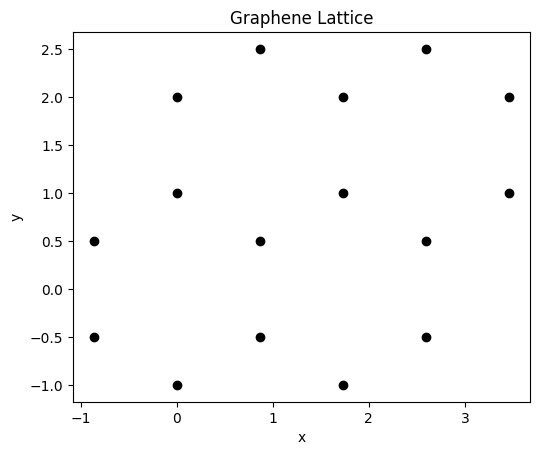

In [44]:
nx = 2
ny = 2
positions = generate_graphene_lattice(nx, ny)

x, y = zip(*positions)
plt.scatter(x, y, color='black')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Graphene Lattice')
plt.gca().set_aspect('equal', adjustable='box')
plt.show()


In [30]:
potentials = []
interactions = {}

bond_length = 1.1
interaction_energy = [0, 0, 0, -0.1]
interactions = find_bonded_interactions(positions, bond_length, interaction_energy)

In [37]:
vertices_count = len(positions)
species_count = 2
dimension = 2
graphene = CrystalStructure(vertices_count, species_count, dimension)

for position in positions:
    graphene.add_position(*position)

for interaction in interactions:
    graphene.add_interaction(interaction[0], interaction[1], interactions[interaction])


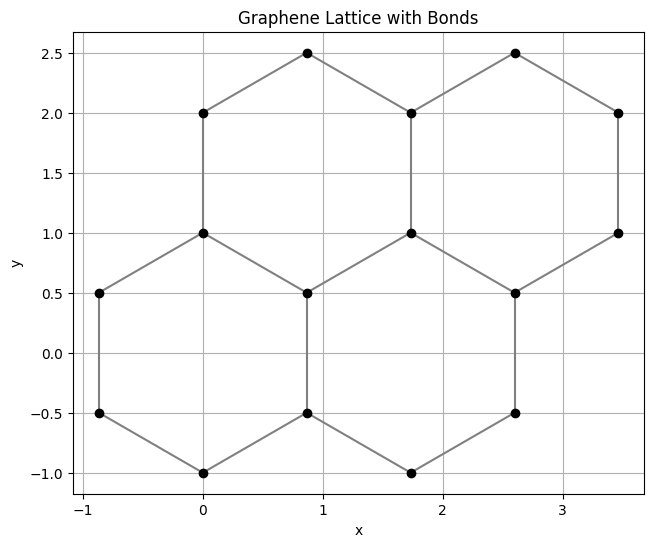

In [47]:
# Plotting the lattice with bonds
plt.figure(figsize=(8, 6))
for (i, j), _ in interactions.items():
    pos1 = positions[i]
    pos2 = positions[j]
    plt.plot([pos1[0], pos2[0]], [pos1[1], pos2[1]], 'gray')  # Draw a line for the bond

# Unpack positions for plotting atoms
x, y = zip(*positions)
plt.scatter(x, y, color='black', zorder=3)  # zorder=3 to draw atoms on top of the bonds

plt.xlabel('x')
plt.ylabel('y')
plt.title('Graphene Lattice with Bonds')
plt.gca().set_aspect('equal', adjustable='box')
plt.grid(True)
plt.show()

In [50]:
crystal_file = '../native_crystal_database/graphene_supercell'
graphene.to_file(crystal_file)